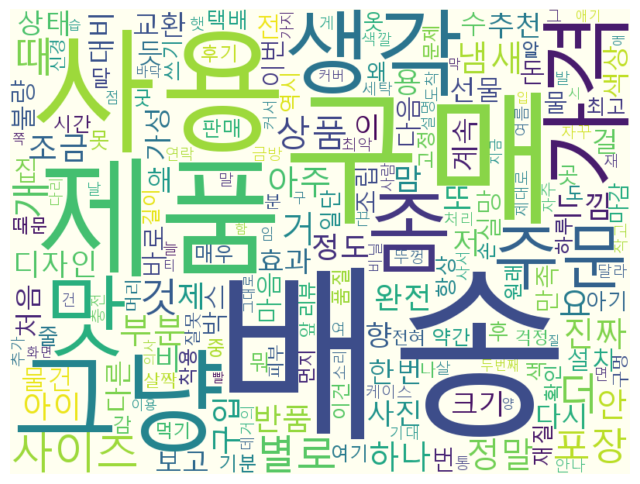

In [1]:
#네이버 쇼핑 리뷰 데이터
import urllib.request
import pandas as pd
import re
from collections import Counter
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from matplotlib import font_manager
from wordcloud import WordCloud

# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")
data = pd.read_table('ratings_total.txt', names=['reviews'])# reviews만 읽기

data_sample = data.tail(20000) # 시간 문제로 마지막 20000개 리뷰만 사용

# 모든 리뷰를 하나의 문자열로 결합 (이모티콘 및 특수 문자 제거)
message = ''
for review in data_sample['reviews']:
    k_review = re.sub(r'[^\w]', ' ', review)  
    message += k_review + ' '

nlp = Okt() # 한글 처리
message_N = nlp.nouns(message) # 명사 추출
count = Counter(message_N) # 빈도수 계산

# 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

# 워드클라우드 생성
wc = WordCloud(font_path=font_path, background_color='ivory', width=800, height=600).generate_from_frequencies(count) # 글씨 크기, 배경색 설정
plt.figure(figsize=(8, 8)) # 크기 설정
plt.imshow(wc, interpolation='bilinear') # 색상 설정
plt.axis('off') # 축 안보이게 설정
plt.show() # 출력

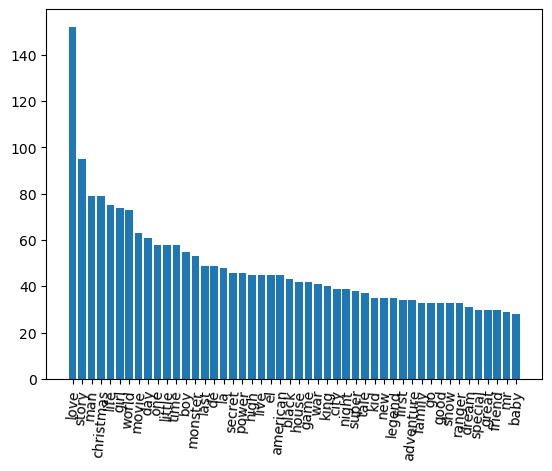

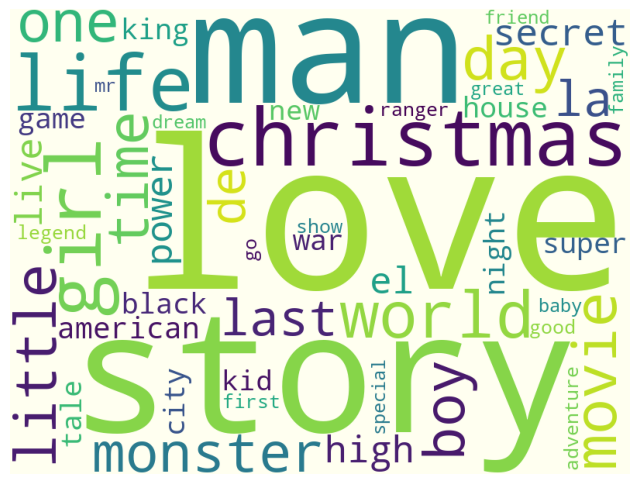

In [2]:
# 넷플릭스 분석
import nltk
# nltk.download()
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

#넷플릭스 제목만 가져오기
df = pd.read_csv('netflix_titles.csv')
df = df['title']

# 불용어, 형태소 설정
stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

# 제목에서 단어 추출
words = []
for title in df:
    EnWords = re.sub(r'[^a-zA-z]+', ' ', str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

# 단어 빈도수 계산
words2 = list(reduce(lambda x, y: x + y, words))
count = Counter(words2)
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag)) > 1 ):
        word_count[tag] = counts
        # print('%s : %d'% (tag, counts))

# 바 차트 시각화
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 85)
plt.show

# 워드클라우드 시각화
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc. generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()